In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.shape

(205, 26)

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [51]:
# Count of numerical columns
num_numerical_columns = df.select_dtypes(include='number').shape[1]

print(f"Number of numerical columns: {num_numerical_columns}")

Number of numerical columns: 16


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

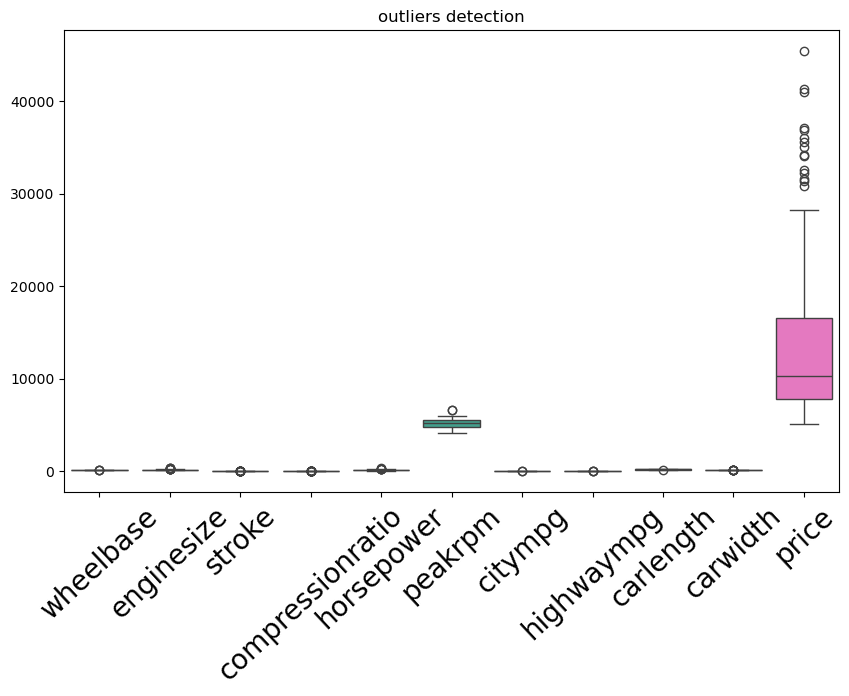

In [5]:
outliers_columns = ['wheelbase','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','carlength','carwidth','price']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[outliers_columns])
plt.title('outliers detection')
plt.xticks(rotation=43, fontsize=20)
plt.show()

In [7]:
# treating the outlier columns using IQR method
outliers_columns = ['wheelbase','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','carlength','carwidth','highwaympg','price']

q1 = df[outliers_columns].quantile(0.25)
q3 = df[outliers_columns].quantile(0.75)

iqr = q3 - q1

outlier_lower = df[outliers_columns] < (q1 - 1.5 * iqr)
outlier_upper = df[outliers_columns] > (q3 + 1.5 * iqr)

In [9]:
outliers = (df[outliers_columns] < (q1 - 1.5 * iqr)) | (df[outliers_columns] > (q3 + 1.5 * iqr))
percentage = (outliers.sum()/len(df))*100

In [27]:
percentage

wheelbase            1.463415
enginesize           4.878049
stroke               9.756098
compressionratio    13.658537
horsepower           2.926829
peakrpm              0.975610
citympg              0.975610
carlength            0.487805
carwidth             3.902439
highwaympg           1.463415
price                7.317073
dtype: float64

In [11]:
# treating the outliers using capping method
df[outliers_columns] = df[outliers_columns].clip(lower=q1-1.5*iqr,upper=q3+1.5*iqr,axis=1)

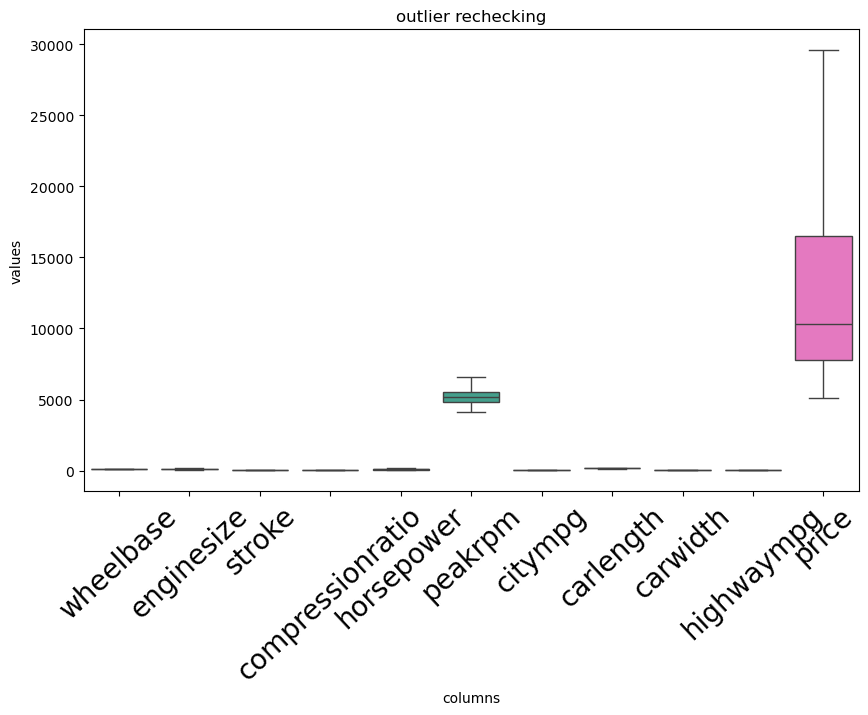

In [13]:
# rechecking the outiers
outliers_recheck = ['wheelbase','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','carlength','carwidth','highwaympg','price']  
plt.figure(figsize=(10,6))
sns.boxplot(data=df[outliers_recheck])
plt.title('outlier rechecking')
plt.xlabel('columns')
plt.ylabel('values')
plt.xticks(rotation=43, fontsize=20)
plt.show()

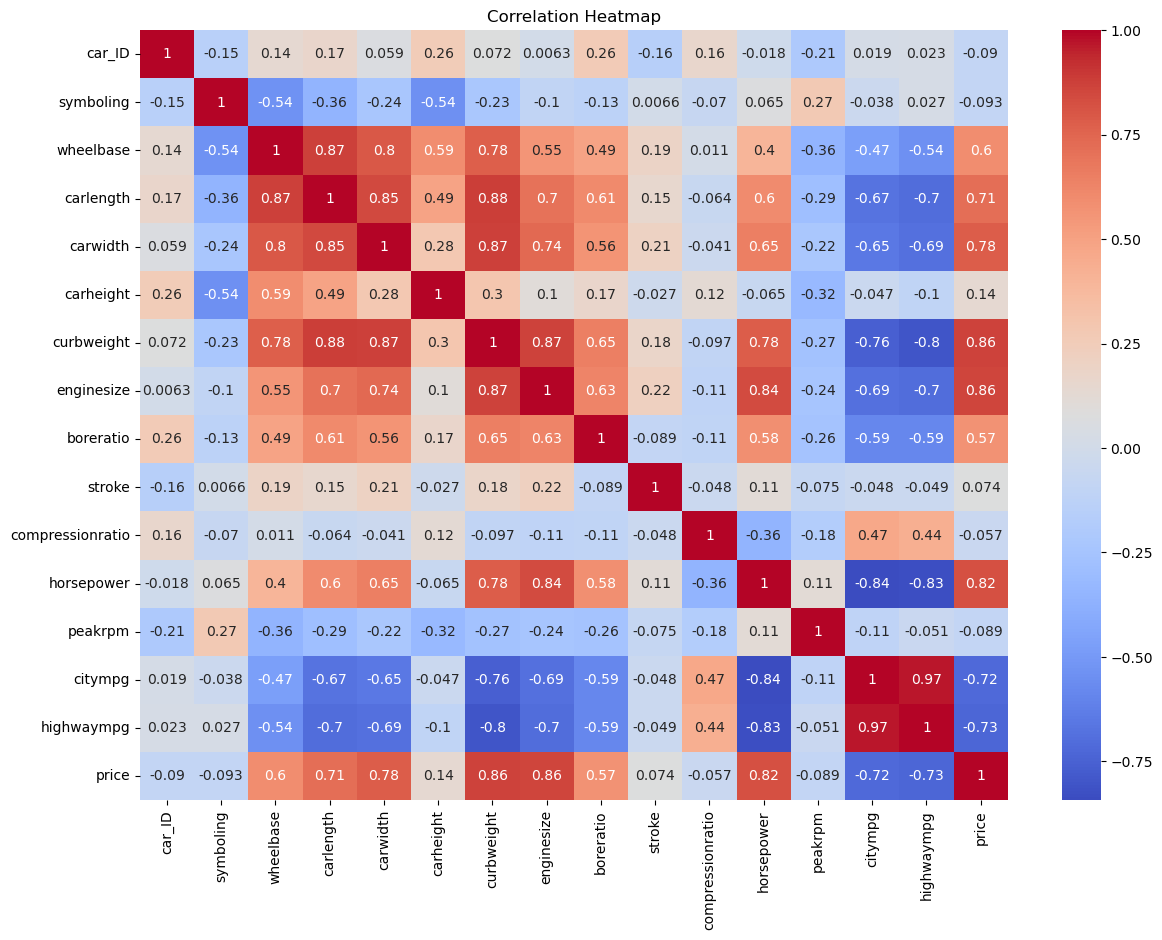

In [33]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
if 'CarName' in df.columns:
    df['company'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

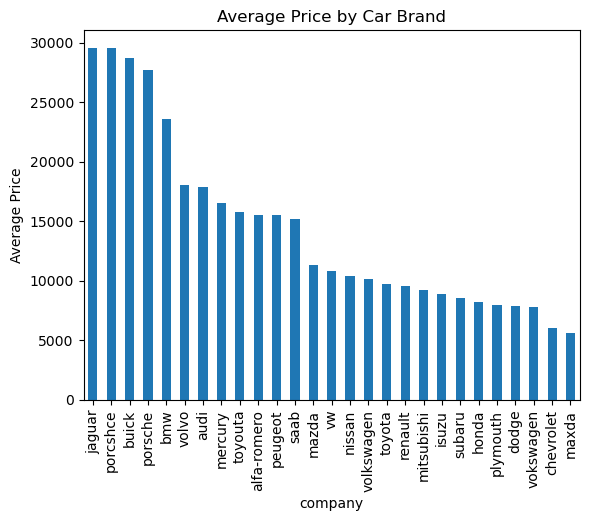

In [17]:
# to view the average price by car brand
if 'company' in df.columns:
    brand_avg_price = df.groupby('company')['price'].mean().sort_values(ascending=False)
    brand_avg_price.plot(kind='bar')
    plt.title("Average Price by Car Brand")
    plt.ylabel("Average Price")
    plt.xticks(rotation=90)
    plt.show()

In [19]:
df.drop('CarName', axis=1, inplace=True)

In [21]:
# to know the categorical columns in the dataset 
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'company']


In [22]:
for col in categorical_columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'fueltype':
fueltype
gas       185
diesel     20
Name: count, dtype: int64

Value counts for 'aspiration':
aspiration
std      168
turbo     37
Name: count, dtype: int64

Value counts for 'doornumber':
doornumber
four    115
two      90
Name: count, dtype: int64

Value counts for 'carbody':
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

Value counts for 'drivewheel':
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

Value counts for 'enginelocation':
enginelocation
front    202
rear       3
Name: count, dtype: int64

Value counts for 'enginetype':
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

Value counts for 'cylindernumber':
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

Value counts for 'fuelsys

In [23]:
# Map text to integers for cylinder number
cylinder_map = {
    'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'eight': 8,
    'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_map)

In [25]:
df.cylindernumber.value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [30]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0,audi


In [27]:
df = pd.get_dummies(df, columns=['carbody', 'company','fuelsystem', 'enginetype', 'drivewheel'])

In [29]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,gas,std,two,front,88.6,168.8,64.1,48.8,...,True,False,False,False,False,False,False,False,False,True
1,2,3,gas,std,two,front,88.6,168.8,64.1,48.8,...,True,False,False,False,False,False,False,False,False,True
2,3,1,gas,std,two,front,94.5,171.2,65.5,52.4,...,False,False,False,False,False,True,False,False,False,True
3,4,2,gas,std,four,front,99.8,176.6,66.2,54.3,...,False,False,False,True,False,False,False,False,True,False
4,5,2,gas,std,four,front,99.4,176.6,66.4,54.3,...,False,False,False,True,False,False,False,True,False,False


In [31]:
# label encoding for the fueltype,aspiration,enginelocation
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols_to_encode = ['fueltype', 'aspiration', 'enginelocation'] 


for col in cols_to_encode:
    df[col] = encoder.fit_transform(df[col])

In [33]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,1,0,two,0,88.6,168.8,64.1,48.8,...,True,False,False,False,False,False,False,False,False,True
1,2,3,1,0,two,0,88.6,168.8,64.1,48.8,...,True,False,False,False,False,False,False,False,False,True
2,3,1,1,0,two,0,94.5,171.2,65.5,52.4,...,False,False,False,False,False,True,False,False,False,True
3,4,2,1,0,four,0,99.8,176.6,66.2,54.3,...,False,False,False,True,False,False,False,False,True,False
4,5,2,1,0,four,0,99.4,176.6,66.4,54.3,...,False,False,False,True,False,False,False,True,False,False


In [49]:
# using map for doornumber 
door_map = {
    'two': 2,
    'four': 4
}

df['doornumber'] = df['doornumber'].map(door_map)

In [51]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,1,0,2,0,-1.723005,-0.426521,-0.858695,48.8,...,1,0,0,0,0,0,0,0,0,1
1,2,3,1,0,2,0,-1.723005,-0.426521,-0.858695,48.8,...,1,0,0,0,0,0,0,0,0,1
2,3,1,1,0,2,0,-0.717590,-0.231513,-0.184978,52.4,...,0,0,0,0,0,1,0,0,0,1
3,4,2,1,0,4,0,0.185580,0.207256,0.151880,54.3,...,0,0,0,1,0,0,0,0,1,0
4,5,2,1,0,4,0,0.117416,0.207256,0.248125,54.3,...,0,0,0,1,0,0,0,1,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   fueltype             205 non-null    int32  
 3   aspiration           205 non-null    int32  
 4   doornumber           205 non-null    int64  
 5   enginelocation       205 non-null    int32  
 6   wheelbase            205 non-null    float64
 7   carlength            205 non-null    float64
 8   carwidth             205 non-null    float64
 9   carheight            205 non-null    float64
 10  curbweight           205 non-null    int64  
 11  cylindernumber       205 non-null    int64  
 12  enginesize           205 non-null    float64
 13  boreratio            205 non-null    float64
 14  stroke               205 non-null    float64
 15  compressionratio     205 non-null    flo

In [35]:
# scaling the numerical columns 
nm=['wheelbase','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','carlength','carwidth','highwaympg',]
scaler =StandardScaler()
df[nm]=scaler.fit_transform(df[nm])

In [43]:
df.mean()

car_ID              103.000000
symboling             0.834146
fueltype              0.902439
aspiration            0.180488
doornumber            3.121951
                       ...    
enginetype_ohcv       0.063415
enginetype_rotor      0.019512
drivewheel_4wd        0.043902
drivewheel_fwd        0.585366
drivewheel_rwd        0.370732
Length: 71, dtype: float64

In [62]:
df.std()

car_ID              59.322565
symboling            1.245307
fueltype             0.297446
aspiration           0.385535
doornumber           0.994966
                      ...    
enginetype_ohcv      0.244304
enginetype_rotor     0.138655
drivewheel_4wd       0.205380
drivewheel_fwd       0.493865
drivewheel_rwd       0.484183
Length: 71, dtype: float64

In [64]:
df.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,205.000000,...,205.000000,2.050000e+02,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000
mean,103.000000,0.834146,0.902439,0.180488,3.121951,0.014634,-1.065814e-15,3.691356e-15,4.904478e-15,53.724878,...,4.380488,-1.992986e-16,3.329756,2.980813e-15,6.845473e-16,-2.057974e-17,-6.932124e-16,2.469569e-16,9.856614e-17,12831.310571
std,59.322565,1.245307,0.297446,0.385535,0.994966,0.120377,1.002448e+00,1.002448e+00,1.002448e+00,2.443522,...,1.080854,1.002448e+00,0.270844,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,6716.631714
min,1.000000,-2.000000,0.000000,0.000000,2.000000,0.000000,-2.063824e+00,-2.677244e+00,-2.687352e+00,47.800000,...,2.000000,-1.875720e+00,2.540000,-2.179040e+00,-2.071118e+00,-1.545246e+00,-2.054752e+00,-1.884688e+00,-2.202350e+00,5118.000000
25%,52.000000,0.000000,1.000000,0.000000,2.000000,0.000000,-7.175899e-01,-6.296552e-01,-8.586945e-01,52.000000,...,4.000000,-8.135028e-01,3.150000,-5.496614e-01,-5.548541e-01,-9.253886e-01,-6.844030e-01,-9.581629e-01,-8.521802e-01,7788.000000
50%,103.000000,1.000000,1.000000,0.000000,4.000000,0.000000,-2.915663e-01,-6.900603e-02,-1.849785e-01,54.100000,...,4.000000,-1.348641e-01,3.310000,1.020901e-01,-4.943268e-02,-2.210047e-01,1.588884e-01,-1.860584e-01,-1.020860e-01,10295.000000
75%,154.000000,2.000000,1.000000,0.000000,4.000000,0.000000,6.286445e-01,7.354037e-01,4.887376e-01,55.500000,...,4.000000,4.847625e-01,3.580000,5.365910e-01,4.559888e-01,3.706777e-01,7.913570e-01,7.404671e-01,4.979894e-01,16503.000000
max,205.000000,3.000000,1.000000,1.000000,4.000000,1.000000,2.647996e+00,2.766741e+00,2.509886e+00,59.800000,...,12.000000,2.432160e+00,3.940000,2.165970e+00,1.972253e+00,2.314777e+00,3.004997e+00,3.288412e+00,2.523244e+00,29575.500000


In [55]:
# converting all the bool columns into int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   fueltype             205 non-null    int32  
 3   aspiration           205 non-null    int32  
 4   doornumber           205 non-null    object 
 5   enginelocation       205 non-null    int32  
 6   wheelbase            205 non-null    float64
 7   carlength            205 non-null    float64
 8   carwidth             205 non-null    float64
 9   carheight            205 non-null    float64
 10  curbweight           205 non-null    int64  
 11  cylindernumber       205 non-null    int64  
 12  enginesize           205 non-null    float64
 13  boreratio            205 non-null    float64
 14  stroke               205 non-null    float64
 15  compressionratio     205 non-null    flo

In [57]:
# splitting the dataset into x and y
x = df.drop(columns = ['price'])
y = df['price']

In [51]:
x.shape

(205, 70)

In [76]:
y.shape

(205,)

In [59]:
# splitting the datase into x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train.shape

(164, 70)

In [86]:
x_test.shape

(41, 70)

In [88]:
y_train.shape

(164,)

In [92]:
df[nm].skew()

wheelbase           0.924916
enginesize          0.908453
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
carlength           0.155954
carwidth            0.776278
highwaympg          0.347441
dtype: float64

# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [57]:
# prediction 
lr_model_prediction = lr_model.predict(x_test)

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def model_evalution(y_actual,y_predict,model_name):
    print(f"{model_name} performance:")
    print("MAE:",mean_absolute_error(y_actual,y_predict))
    print("MSE:",mean_squared_error(y_actual,y_predict))
    print("R2 score:",r2_score(y_actual,y_predict))
    print("\n")

In [63]:
model_evalution(y_test,lr_model_prediction,'linear regression')

linear regression performance:
MAE: 1840.0206815689353
MSE: 10424865.287158947
R2 score: 0.8031624800983619




# Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
dct_model = DecisionTreeRegressor()
dct_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
# prediction
dct_model_prediction = dct_model.predict(x_test)

In [70]:
model_evalution(y_test,dct_model_prediction,'Decision Tree Regressor')

Decision Tree Regressor performance:
MAE: 1130.4309024390245
MSE: 2510672.959802171
R2 score: 0.9525946259180635




#  Random Forest Regressor

In [65]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [75]:
# prediction 
rfr_prediction = rfr_model.predict(x_test)

In [77]:
model_evalution(y_test,rfr_prediction,' Random Forest Regressor')

 Random Forest Regressor performance:
MAE: 1080.5226341463413
MSE: 2297743.9622608284
R2 score: 0.9566150534858716




# Gradient Boosting Regressor

In [67]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [69]:
gbr_prediction =gbr_model.predict(x_test)

In [75]:
model_evalution(y_test,gbr_prediction,'Gradient Boosting Regressor')

Gradient Boosting Regressor performance:
MAE: 1036.7965250393777
MSE: 1969670.3065032817
R2 score: 0.9628095896228444




# Support Vector Regressor

In [87]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [89]:
svr_prediction = svr_model.predict(x_test)

In [91]:
model_evalution(y_test,svr_prediction,'Support Vector Regressor')

Support Vector Regressor performance:
MAE: 5108.866482258667
MSE: 57900787.904392384
R2 score: -0.09325609276600622




In [99]:
#function to visualize the actual vs predicted values
def visualize_predictions(y_actual, y_predi, model_name):
    results_df = pd.DataFrame({'actual':y_actual.values,'prediction':y_predi})
    print(results_df.head(40))


    plt.figure(figsize=(8,5))
    sns.scatterplot(x=y_actual, y=y_predi, color='blue', alpha=0.6)
    plt.plot([y_actual.min(),y_actual.max()],[y_actual.min(),y_actual.max()],color='red', linestyle='--')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.title(f"actual vs predicted -{model_name}")
    plt.show()

       actual    prediction
0   29575.500  24618.492984
1   17859.167  21722.097124
2    9549.000  10432.051679
3   11850.000  13441.123864
4   28248.000  29282.497385
5    7799.000   7733.784208
6    7788.000   7365.853596
7    9258.000   7343.353088
8   10198.000   9753.849162
9    7775.000  23961.166916
10  13295.000  12499.042869
11   8238.000   8118.923618
12  18280.000  15141.988396
13   9988.000  10640.133022
14  29575.500  29510.762582
15   6488.000   5702.280791
16   5151.000   -364.867844
17  12629.000  12158.982014
18   8189.000   9092.442510
19   9960.000   9176.847734
20   8495.000  10816.369075
21  13499.000  14610.870190
22   8249.000   8516.621340
23   6479.000   5508.275872
24   6692.000   7193.004147
25  29575.500  25692.198505
26   9639.000  10068.255467
27  13415.000  15706.255823
28   7999.000   7289.972058
29  12940.000  15287.078348
30  25552.000  28041.858390
31   6229.000   6767.740067
32   7898.000   4095.045533
33  21485.000  17934.413037
34   7689.000   8245

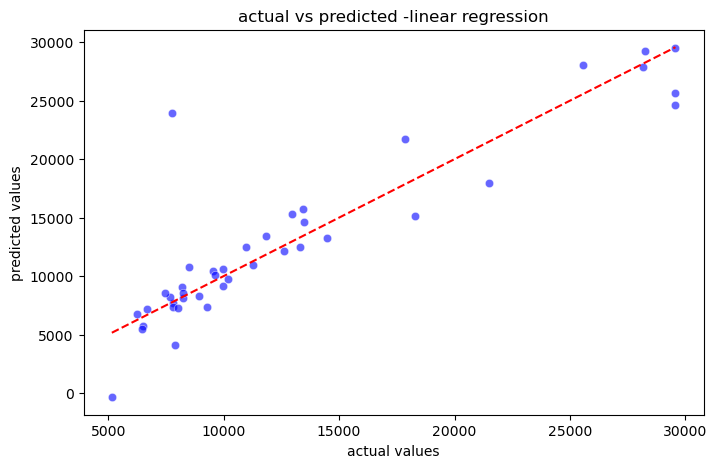

In [101]:
visualize_predictions(y_test,lr_model_prediction,'linear regression')

       actual  prediction
0   29575.500     29575.5
1   17859.167     15998.0
2    9549.000      8949.0
3   11850.000     12170.0
4   28248.000     29575.5
5    7799.000      5118.0
6    7788.000      7995.0
7    9258.000      8358.0
8   10198.000      8949.0
9    7775.000      7995.0
10  13295.000     13645.0
11   8238.000      8058.0
12  18280.000     13645.0
13   9988.000     11248.0
14  29575.500     29575.5
15   6488.000      6669.0
16   5151.000      5399.0
17  12629.000     14869.0
18   8189.000      6989.0
19   9960.000      8949.0
20   8495.000     10245.0
21  13499.000     13499.0
22   8249.000      7499.0
23   6479.000      5348.0
24   6692.000      7609.0
25  29575.500     29575.5
26   9639.000      8449.0
27  13415.000     16515.0
28   7999.000      7499.0
29  12940.000     15985.0
30  25552.000     29575.5
31   6229.000      6669.0
32   7898.000      6785.0
33  21485.000     18920.0
34   7689.000      7957.0
35  28176.000     29575.5
36  11259.000     11694.0
37  10945.00

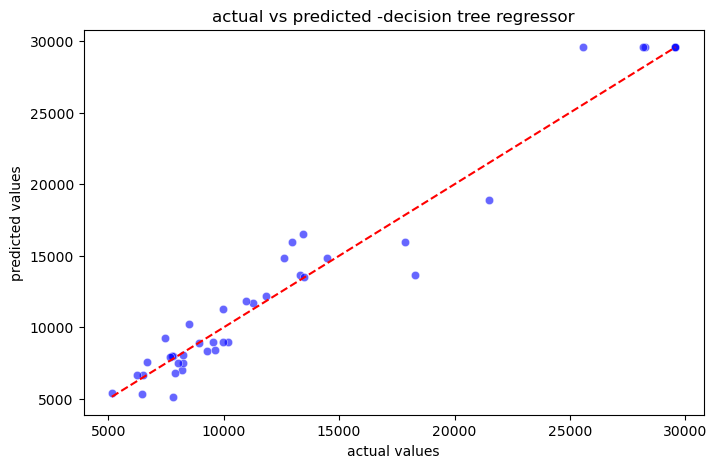

In [103]:
visualize_predictions(y_test,dct_model_prediction,'decision tree regressor')

       actual  prediction
0   29575.500   29356.625
1   17859.167   18981.105
2    9549.000    8936.780
3   11850.000   12762.420
4   28248.000   25245.685
5    7799.000    6614.320
6    7788.000    7815.770
7    9258.000    7983.090
8   10198.000    9558.500
9    7775.000    8109.865
10  13295.000   13831.160
11   8238.000    7920.250
12  18280.000   13721.050
13   9988.000   10874.230
14  29575.500   29575.500
15   6488.000    6385.870
16   5151.000    5797.460
17  12629.000   14256.720
18   8189.000    8626.270
19   9960.000    8858.390
20   8495.000    9901.060
21  13499.000   15573.315
22   8249.000    7266.935
23   6479.000    5919.850
24   6692.000    7315.710
25  29575.500   29356.625
26   9639.000    9193.370
27  13415.000   16816.100
28   7999.000    7379.900
29  12940.000   16604.980
30  25552.000   25274.905
31   6229.000    6419.360
32   7898.000    7890.220
33  21485.000   19439.735
34   7689.000    8123.660
35  28176.000   25240.685
36  11259.000    9974.050
37  10945.00

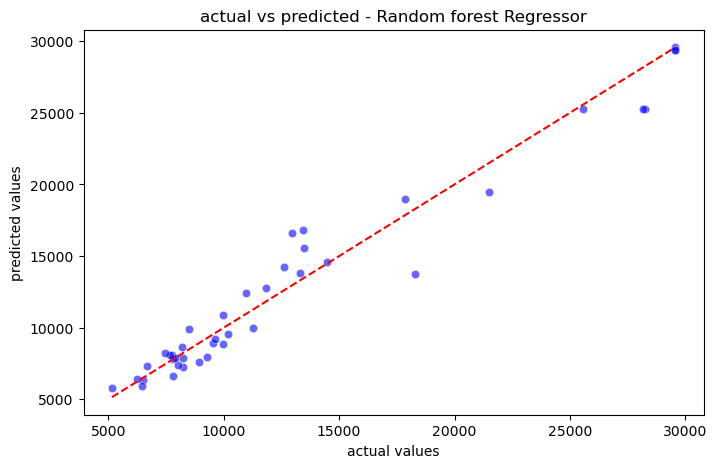

In [105]:
visualize_predictions(y_test,rfr_prediction,' Random forest Regressor')

       actual    prediction
0   29575.500  29391.360106
1   17859.167  19590.502429
2    9549.000   8617.853066
3   11850.000  12153.210447
4   28248.000  29075.852270
5    7799.000   6870.175818
6    7788.000   7798.211018
7    9258.000   7602.527622
8   10198.000   8916.227033
9    7775.000   8238.930367
10  13295.000  13139.272775
11   8238.000   7614.391297
12  18280.000  15160.264810
13   9988.000  10749.108422
14  29575.500  29451.235087
15   6488.000   6168.773953
16   5151.000   5302.298312
17  12629.000  13959.594160
18   8189.000   8545.787231
19   9960.000   8453.213918
20   8495.000  10112.776216
21  13499.000  15339.693041
22   8249.000   6957.734060
23   6479.000   5715.247160
24   6692.000   6972.747733
25  29575.500  29249.337504
26   9639.000   9930.446638
27  13415.000  16585.289616
28   7999.000   6957.734060
29  12940.000  16585.289616
30  25552.000  29238.953954
31   6229.000   6576.692654
32   7898.000   6578.418478
33  21485.000  19917.725687
34   7689.000   8186

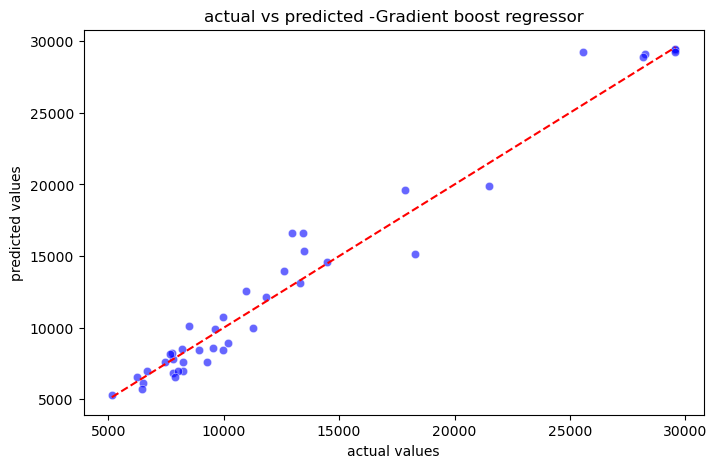

In [107]:
visualize_predictions(y_test,gbr_prediction,'Gradient boost regressor')


       actual    prediction
0   29575.500  10660.056946
1   17859.167  10657.274783
2    9549.000  10644.237437
3   11850.000  10650.486672
4   28248.000  10666.515094
5    7799.000  10639.792500
6    7788.000  10643.788547
7    9258.000  10641.561035
8   10198.000  10646.894031
9    7775.000  10643.558135
10  13295.000  10650.544938
11   8238.000  10642.604336
12  18280.000  10650.693083
13   9988.000  10646.180982
14  29575.500  10667.784278
15   6488.000  10639.605077
16   5151.000  10633.024913
17  12629.000  10653.564518
18   8189.000  10646.011844
19   9960.000  10644.893469
20   8495.000  10646.097257
21  13499.000  10657.972926
22   8249.000  10639.489440
23   6479.000  10635.455296
24   6692.000  10639.205512
25  29575.500  10662.208770
26   9639.000  10648.325838
27  13415.000  10656.978925
28   7999.000  10639.930299
29  12940.000  10654.932204
30  25552.000  10663.969753
31   6229.000  10638.881153
32   7898.000  10644.041611
33  21485.000  10656.615164
34   7689.000  10641

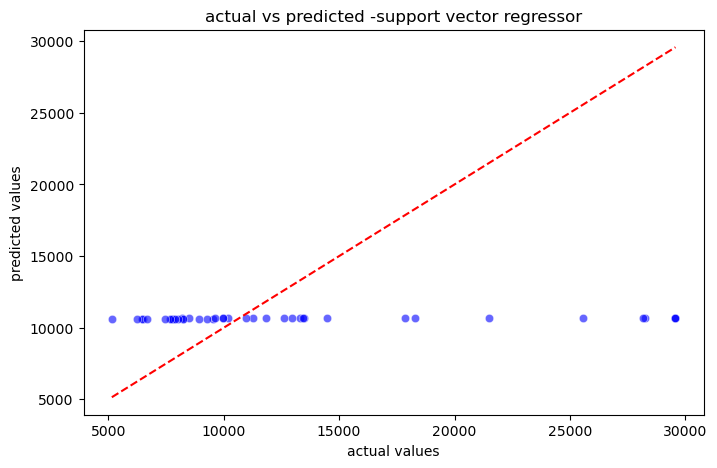

In [109]:
visualize_predictions(y_test,svr_prediction,'support vector regressor')

# conclusion for which model is best 

In [ ]:
# Model performance summary 
Model	                     MAE	       MSE	       R² Score
Linear Regression	        1840.02	  10,424,865.29	   0.8032
Decision Tree Regressor	    1130.43	  2,510,672.96     0.9526
Random Forest Regressor	    1080.52	  2,297,743.96     0.9566
Gradient Boosting Regressor	1043.60	  1,982,810.05	   0.9626
Support Vector Regressor	5108.87	  57,900,787.90	  -0.0933

In [113]:
feature_importance = gbr_model.feature_importances_
features = x.columns

In [115]:
#Creating DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

In [117]:
print("\nTop 10 Important Features:")
print(importance_df.head(10))


Top 10 Important Features:
        Feature  Importance
10   curbweight    0.492285
12   enginesize    0.212665
19   highwaympg    0.102750
16   horsepower    0.073001
0        car_ID    0.032346
8      carwidth    0.020467
7     carlength    0.018783
6     wheelbase    0.011092
27  company_bmw    0.005931
18      citympg    0.004490


C:\Users\thask\AppData\Local\Temp\ipykernel_13676\1476868285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


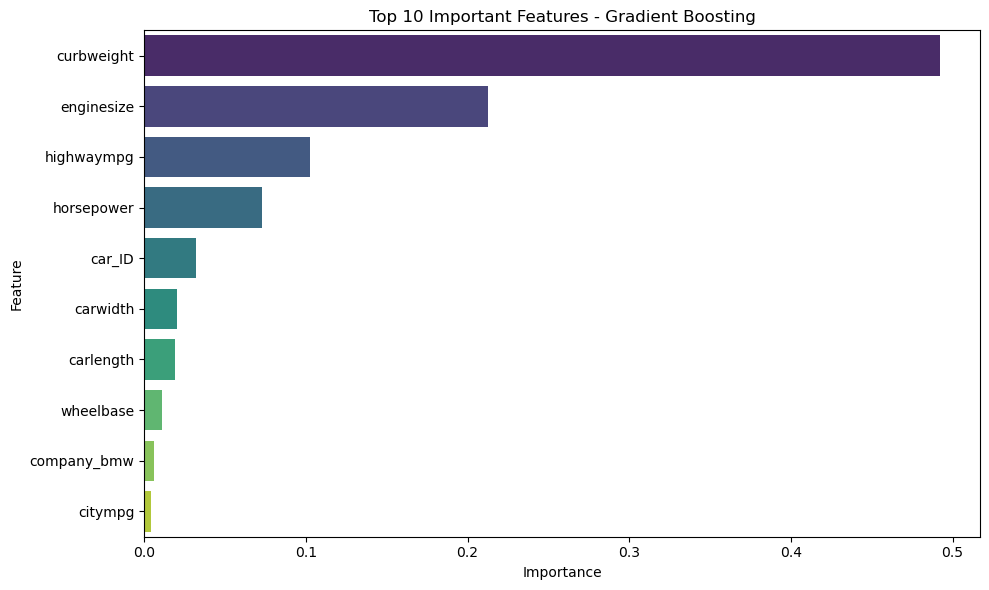

In [119]:
# plotting the important festures
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features - Gradient Boosting')
plt.tight_layout()
plt.show()

In [ ]:
# Hypertunning 

In [77]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}


In [83]:
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                   scoring='r2', cv=3, n_jobs=-1, verbose=1)
# Fit the model

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [87]:
# Best model
best_gbr = grid_search.best_estimator_
print("\nBest Parameters Found:\n", grid_search.best_params_)

# Evaluate on test set
y_pred_tuned = best_gbr.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("\nPerformance After Tuning:")
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_tuned))
print("R² Score:", r2_score(y_test, y_pred_tuned))


Best Parameters Found:
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Performance After Tuning:
MAE: 1035.4480242340023
MSE: 1915022.1454096748
R² Score: 0.9638414311095733


In [103]:
df.sample()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
110,111,0,0,1,4,0,2.639475,2.019209,1.210576,58.7,...,0,0,1,0,0,0,0,0,0,1


In [105]:
df.iloc[109:111]

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
109,110,0,1,0,4,0,2.639475,2.019209,1.210576,58.7,...,0,0,1,0,0,0,0,0,0,1
110,111,0,0,1,4,0,2.639475,2.019209,1.210576,58.7,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# new data
new_car = [[111	0	0	1	4	0	2.639475	2.019209	1.210576	58.7	...	0	0	